In [1]:
! pip install tensorflow_datasets

In [1]:
import os
import pandas as pd
from konlpy.tag import Okt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
import re

## 전처리된 데이터 로드

In [2]:
# 형태소 분석하는 함수 
def morph_analyze(text):
    
    # Okt 형태소 분석기 객체 생성
    okt = Okt()
    # 텍스트에서 형태소 분석
    morphs = okt.morphs(text)
    return morphs

In [3]:
# 각 문장의 불용어, 특수 문자 등을 제거하는 function: {return: 정리된 문장}
def sentence_analysis(sentence):
    #불용어
    stopwords = ['은','는','이','가','을','를','에','이가','이는']
    sentence = re.sub(r'@[^@]+@', 'pronoun', sentence)
    sentence = re.sub(r'name1', 'pronoun', sentence)
    sentence = re.sub(r'company-name' , 'pronoun', sentence)
    sentence = re.sub(r'\n', " ", sentence)
    
    # 특수문자 제거 (문장내의 특수 문자제거)
    sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!\s]", "", sentence)
    
    # 영어라면 소문자로 변환
    sentence = sentence.lower() # 텍스트 소문자화
    #형태소 분석
    sentence = morph_analyze(sentence)
    
    # 불용어 제거 
    sen = []
    for word in sentence:
        if word in stopwords:
            continue
        sen.append(word)
       
    sentence = ' '.join(sen)

    return sentence


In [4]:
# 결측치 제거, 중복 제거, 불용어 제거한 데이터를 제공하는 fucntion
def load_data(path):
    train_data_path = path
    data = pd.read_csv(train_data_path)
    
    # # 결측치 제거
    # null_check = data.isnull().sum()
    # check = False
    # for i in range(len(null_check)):
    #     if null_check[i] > 0:
    #         check = True
            
    # if check == True:
    #     data = data.dropna()
    
    # 중복 제거
    data.drop_duplicates(subset = ['conversation'], inplace=True)
    
    
    data['conversation'] = data['conversation'].map(lambda x: sentence_analysis(x))

    return data

In [16]:
# 결측치 제거, 중복 제거, 불용어 제거한 데이터를 제공하는 fucntion
def load_test(data):
        
#     # 결측치 제거
#     null_check = data.isnull().sum()
#     check = False
#     for i in range(len(null_check)):
#         if null_check[i] > 0:
#             check = True
            
#     if check == True:
#         data = data.dropna()
    
#     # 중복 제거
#     data.drop_duplicates(subset = ['conversation'], inplace=True)
    
    
    data['conversation'] = data['conversation'].map(lambda x: sentence_analysis(x))

    return data

In [5]:
train_data_path ="data/train_with_normal_nikl.csv"
train_data = load_data(train_data_path)

In [6]:
train_data[:5]

,idx,class,conversation
0,0,협박 대화,지금 너 스스로 죽여 달라 고 애원 하는 것 인가 ? 아닙니다 . 죄송합니다 . 죽...
1,1,협박 대화,길동 경찰서 입니다 . 9시 40분 마트 폭발물 설치 할거다 . 네 ? 똑바로 들어...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알 지 ? 나 보다 작은 남자 첨 봤어 . 그만해 . 니 들 놀리...
3,3,갈취 대화,어이 거기 예 ?? 너 말 이야 너 . 이리 오라 고 무슨 일 . 너 옷 좋아 보인...
4,4,갈취 대화,저기 요 혹시 날 너무 뜨겁잖아요 ? 저희 회사 에서 선크림 파는데 한 번 손등 발...


In [7]:
train_data[train_data['idx'] == 806]

,idx,class,conversation
806,806,갈취 대화,밥 한 번만 사주 라 \n 또 ? \n 또 라니 \n 저번 에도 내 샀잖아 \n 그...


In [11]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

In [12]:
sentence = train_data['conversation'][806]
print(sentence)
encoded = get_encoded_sentence(sentence,words_dict)
print(encoded)

밥 한 번만 사주 라 
 또 ? 
 또 라니 
 저번 에도 내 샀잖아 
 그건 다른 이유 고 오늘 축하 할 일이 있으니깐 한번 만 
 다른사람 한테 사 달라 하 면안 돼 ? 
 너 좋아하서 그렇지 친구 좋다는게 뭐 냐 
 . 
 대신 너 좋아하는 거 먹쟈 
 . 알겠어


NameError: name 'words_dict' is not defined

In [95]:
import json

# JSON 파일 경로
json_file_path = '/aiffel/aiffel/dktc/data/test.json' 

# JSON 파일 열기
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
#     data = json.dumps(data, ensure_ascii = False)
    
# 변환된 데이터를 저장할 리스트
converted_data = []

# 데이터 변환 및 리스트에 추가
for key, value in data.items():
    converted_text = json.dumps(value['text'], ensure_ascii = False)
    converted_data.append({
        "file_name": key,
        "conversation": converted_text
    })
df = pd.DataFrame(converted_data)
# 결과 출력
print(df)

output_file_path = '~/aiffel/dktc/test.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

    file_name                                       conversation
0       t_000  "아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸...
1       t_001  "우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요?...
2       t_002  "너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지...
3       t_003  "이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가...
4       t_004  "아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고...
..        ...                                                ...
495     t_495  "미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고...
496     t_496  "교수님 제 논문에 제 이름이 없나요?  아 무슨 논문말이야?  지난 번 냈던 논문...
497     t_497  "야 너  네 저요? 그래 너 왜요 돈좀 줘봐  돈 없어요 돈이 왜 없어 지갑은 폼...
498     t_498  "야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보...
499     t_499  "엄마 저 그 돈 안해주시면 정말 큰일나요.  이유도 말하지 않고. 몇번째니 경민아...

[500 rows x 2 columns]


In [18]:
test_data_path ="~/aiffel/dktc/test.csv"
test_data = load_test(test_df)

In [19]:
test_df

,file_name,conversation
0,t_000,아가씨 담배 한 갑주소 네 4500원 입니다 어 네 지갑 어디 갔지 에이 버스 에서...
1,t_001,우리 팀 에서 다른 팀 으로 갈 사람 없나 ? 그럼 영 지씨 가는건 어때 ? 네 ?...
2,t_002,너 오늘 그게 뭐 야 네 제 뭘 잘 못 했나요 .? 제대로 좀 하지 네 똑바로 좀 ...
3,t_003,거 들어 바 와 노래 진짜 좋다 그치 요즘 것 만 들어 진짜 너무 좋다 내 요즘 듣...
4,t_004,아무튼 앞 으로 니 내 와이파이 야 . . 응 와이파이 온 . 켰어 . 반말 ? 주...
...,...,...
495,t_495,미나 씨 휴가 결제 올 리기 전 저 랑 상의 하 라고 말 한 거 기억 해요 ? 네 ...
496,t_496,교수 님 제 논문 제 이름 없나요 ? 아 무슨 논문 말 이야 ? 지난 번 냈던 논문...
497,t_497,야 너 네 저 요 ? 그래 너 왜 요 돈좀 줘 봐 돈 없어요 돈 왜 없어 지갑 폼 ...
498,t_498,야 너 빨리 안 뛰어와 ? 너 환자 제대로 봤어 안 봤어 어제 저녁 부터 계속 보다...


## 단어사전

In [7]:
#단어 사전 만들어주는 function: {토큰: index} 와 {index: 토큰} dictionary를 제공
def makeVocab(train):
    words = []
    
    for sentence in train['conversation']:
        temp = list(sentence.split(" "))
        words.extend(temp)
        
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    #실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
    word_to_index = {k:(v+3) for k,v in word_to_index.items()}

    # 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
    word_to_index["<PAD>"] = 0
    word_to_index["<BOS>"] = 1
    word_to_index["<UNK>"] = 2  # unknown
    word_to_index["<UNUSED>"] = 3

    index_to_word = {index:word for word, index in word_to_index.items()}
    return word_to_index, index_to_word

In [9]:
words_dict, idx_dict = makeVocab(train_data)

## 토큰 정수화

In [10]:
#token화된 list를 정수화로 바꿔주는 function : {return: 정수화된 list}
def wordlist_to_indexlist(wordlist, word_to_index):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]

In [23]:
X_train = []
for sen in train_data['conversation']:
    sen = list(sen.split(" "))
    X_train.append(sen)

In [12]:
X_train = [wordlist_to_indexlist(wordlist, words_dict) for wordlist in X_train]

In [24]:
X_test = []
for sen in test_df['conversation']:
    sen = list(sen.split(" "))
    X_test.append(sen)
    
# X_test = [wordlist_to_indexlist(wordlist, words_dict) for wordlist in X_test]

In [47]:
X_test = np.array(X_test,dtype = 'object')

## class 한글 옵션 숫자 옵션으로 전환

In [8]:
def changeClassInt(data):
    # class_list = {'협박 대화': 0, '갈취 대화': 1. '직장 내 괴롭힘 대화': 2, '기타 괴롭힘 대화': 3, '일반 대화': 4}
    data.loc[data['class'] == '협박 대화', 'class'] = 0
    data.loc[data['class'] == '갈취 대화', 'class'] = 1
    data.loc[data['class'] == '직장 내 괴롭힘 대화', 'class'] = 2
    data.loc[data['class'] == '기타 괴롭힘 대화', 'class'] = 3
    data.loc[data['class'] == '일반 대화', 'class'] = 4
    
    return data

In [29]:
train_data = changeClassInt(train_data)

In [30]:
# target data 만들기
tar_data = train_data['class']

In [21]:
! pip install Keras-Preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 521.6 kB/s eta 0:00:00


In [25]:
from keras_preprocessing.sequence import pad_sequences

total_data_text = list(X_train)+list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_len = int(max_tokens)
print('pad_sequences maxlen : ', max_len)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  142.4451926674149
문장길이 최대 :  2082
문장길이 표준편차 :  196.5606433198903
pad_sequences maxlen :  535
전체 문장의 0.9506172839506173%가 maxlen 설정값 이내에 포함됩니다. 


In [49]:
X_train = np.array(X_train, dtype = 'object')
X_train = pad_sequences(X_train, value = words_dict['<PAD>'], padding='pre', maxlen=max_len)

X_test = np.array(X_test, dtype = 'object')
X_test = pad_sequences(X_test, value = words_dict['<PAD>'], padding='pre', maxlen=max_len)

## 데이터셋 분리

In [31]:
# 데이터 분리 function
from sklearn.model_selection import train_test_split

def makeDataset(cov_data, tar_data):
    # stratify : class가 균등하게 나눠지게 됨.train_test_split stratify
    
    X_train, X_val, y_train,y_val = train_test_split(cov_data, tar_data, test_size = 0.2, random_state = 928, stratify = tar_data)    
    
    return X_train, X_val, y_train, y_val 

In [32]:
X_train, X_val, y_train, y_val = makeDataset(X_train, tar_data)

In [68]:
X_train = np.asarray(X_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
print(len(X_train))

3876


# Baseline

- Bidirectional LSTM

In [34]:
class_map = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4,
}
label_to_class = {v: k for k, v in class_map.items()}

## Training Model

In [35]:
import pandas as pd
from datetime import datetime, timezone, timedelta

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

KST = timezone(timedelta(hours=9))
NOW = datetime.now(KST).strftime('%Y%m%d%H%M%S') # YYYYMMDDHHmmss

# parameters
RANDOM_SEED = 42
TRAIN_CSV_DATA_PATH = "data/train_with_normal_nikl.csv"
TEST_JSON_DATA_PATH = "data/test.json"
SUBMISSION_CSV_DATA_PATH = "data/submission.csv"
EPOCHS = 50
MODEL_PATH = f"models/baseline_{NOW}.keras"

VOCAB_SIZE = len(words_dict)
SEQ_LEN = 100

# fix random seed
tf.random.set_seed(RANDOM_SEED)

# # Data preprocessing
# data = pd.read_csv("data/train_with_normal_nikl.csv")
# data["class_label"] = data["class"].apply(lambda x: class_map[x]) # str -> int

# # Tokenization
# tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<UNK>")
# tokenizer.fit_on_texts(data["conversation"])
# train_sequences = tokenizer.texts_to_sequences(data["conversation"])
# train_sequences = pad_sequences(train_sequences, padding='post', maxlen=SEQ_LEN)

# # Split the data
# X_train, X_val, y_train, y_val = train_test_split(train_sequences, 
#                                                   data["class_label"], 
#                                                   test_size=0.2,
#                                                   random_state=RANDOM_SEED, 
#                                                   stratify=data["class_label"])

def get_model(X, vocab_size, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=X.shape[-1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])
    
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer="adam", 
                  metrics=["accuracy"])
    return model

model = get_model(X_train, VOCAB_SIZE, num_classes=len(class_map))
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(MODEL_PATH,
                                       monitor="val_loss",
                                       save_best_only=True)
]
history = model.fit(X_train, y_train, 
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)

Epoch 1/50
122/122 [==============================] - 34s 42ms/step - loss: 1.3380 - accuracy: 0.3793 - val_loss: 1.1451 - val_accuracy: 0.4639
Epoch 2/50
122/122 [==============================] - 4s 33ms/step - loss: 0.9041 - accuracy: 0.6184 - val_loss: 0.7851 - val_accuracy: 0.7052
Epoch 3/50
122/122 [==============================] - 4s 34ms/step - loss: 0.4138 - accuracy: 0.8431 - val_loss: 0.6281 - val_accuracy: 0.7577
Epoch 4/50
122/122 [==============================] - 4s 34ms/step - loss: 0.1906 - accuracy: 0.9391 - val_loss: 0.5481 - val_accuracy: 0.8175
Epoch 5/50
122/122 [==============================] - 4s 33ms/step - loss: 0.1510 - accuracy: 0.9572 - val_loss: 0.8652 - val_accuracy: 0.7443
Epoch 6/50
122/122 [==============================] - 4s 33ms/step - loss: 0.0991 - accuracy: 0.9732 - val_loss: 0.8196 - val_accuracy: 0.7835
Epoch 7/50
122/122 [==============================] - 4s 33ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.7227 - val_accuracy: 0.805

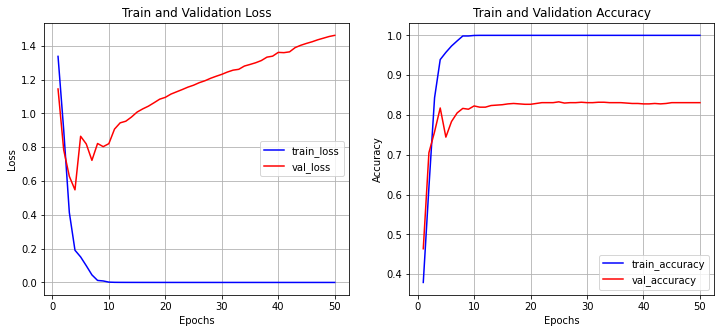

In [36]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## Submission

In [15]:
import json

def load_test_df():
    with open("data/test.json") as file:
        test_json = json.load(file)
    
    file_names = []
    conversations = []
    for file_name in test_json:
        conversation = test_json[file_name]["text"]

        file_names.append(file_name)
        conversations.append(conversation)
        
    return pd.DataFrame({"file_name": file_names, "conversation": conversations})
    
test_df = load_test_df()
test_df

,file_name,conversation
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...,...
495,t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [51]:
import numpy as np

# # Tokenization
# test_sequences = tokenizer.texts_to_sequences(test_df["conversation"])
# test_sequences = pad_sequences(test_sequences, padding="post", maxlen=SEQ_LEN)

# Prediction
model = tf.keras.models.load_model(MODEL_PATH)
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)
test_df["class"] = predictions
test_df["class_str"] = test_df["class"].apply(lambda x: label_to_class[x])
test_df

,file_name,conversation,class,class_str
0,t_000,아가씨 담배 한 갑주소 네 4500원 입니다 어 네 지갑 어디 갔지 에이 버스 에서...,0,협박 대화
1,t_001,우리 팀 에서 다른 팀 으로 갈 사람 없나 ? 그럼 영 지씨 가는건 어때 ? 네 ?...,2,직장 내 괴롭힘 대화
2,t_002,너 오늘 그게 뭐 야 네 제 뭘 잘 못 했나요 .? 제대로 좀 하지 네 똑바로 좀 ...,2,직장 내 괴롭힘 대화
3,t_003,거 들어 바 와 노래 진짜 좋다 그치 요즘 것 만 들어 진짜 너무 좋다 내 요즘 듣...,3,기타 괴롭힘 대화
4,t_004,아무튼 앞 으로 니 내 와이파이 야 . . 응 와이파이 온 . 켰어 . 반말 ? 주...,3,기타 괴롭힘 대화
...,...,...,...,...
495,t_495,미나 씨 휴가 결제 올 리기 전 저 랑 상의 하 라고 말 한 거 기억 해요 ? 네 ...,2,직장 내 괴롭힘 대화
496,t_496,교수 님 제 논문 제 이름 없나요 ? 아 무슨 논문 말 이야 ? 지난 번 냈던 논문...,2,직장 내 괴롭힘 대화
497,t_497,야 너 네 저 요 ? 그래 너 왜 요 돈좀 줘 봐 돈 없어요 돈 왜 없어 지갑 폼 ...,1,갈취 대화
498,t_498,야 너 빨리 안 뛰어와 ? 너 환자 제대로 봤어 안 봤어 어제 저녁 부터 계속 보다...,1,갈취 대화


In [54]:
submission_df = pd.read_csv("~/aiffel/dktc/data/new_submission.csv")
test_submission_df = (submission_df
                      .merge(test_df[["file_name", "class"]], on="file_name")
                      .drop(columns=["class_x"])
                      .rename(columns={"class_y": "class"}))
test_submission_df.to_csv(f"~/aiffel/dktc/baseline_{NOW}.csv", index=False)
pd.read_csv(f"~/aiffel/dktc/baseline_{NOW}.csv")

,file_name,class
0,t_000,0
1,t_001,2
2,t_002,2
3,t_003,3
4,t_004,3
...,...,...
495,t_495,2
496,t_496,2
497,t_497,1
498,t_498,1


## RNN - LSTM

In [50]:
# 전처리 아주 간단하게만, 형태소없이, 일반 대화 없이 한번 해보기로.
# 각 문장의 불용어, 특수 문자 등을 제거하는 function: {return: 정리된 문장}
def sentence_organizer(sentence):

    sentence = re.sub(r'@[^@]+@', 'pronoun', sentence)
    sentence = re.sub(r'name1', 'pronoun', sentence)
    sentence = re.sub(r'company-name' , 'pronoun', sentence)
    sentence = re.sub(r'\n', " ", sentence)
    
    # 특수문자 제거 (문장내의 특수 문자제거)
    sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!\s]", "", sentence)
    
    # 영어라면 소문자로 변환
    sentence = sentence.lower() # 텍스트 소문자화
    

    return sentence

In [143]:
# 결측치 제거, 중복 제거, 불용어 제거한 데이터를 제공하는 fucntion
def load_data(path):
    train_data_path = path
    data = pd.read_csv(train_data_path)
    
    # 중복 제거
    data.drop_duplicates(subset = ['conversation'], inplace=True)
    
    
    data['conversation'] = data['conversation'].map(lambda x: sentence_organizer(x))

    return data

In [144]:
train_data_path ="data/train.csv"
train = load_data(train_data_path)

In [ ]:
class_map = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4,
}
label_to_class = {v: k for k, v in class_map.items()}

In [145]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

# 랜덤 시드 고정
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# 데이터 로드
texts = train['conversation']  # 텍스트 데이터 컬럼 이름 수정
train = changeClassInt(train)
labels = train['class']  # 클래스 레이블 컬럼 이름 수정
labels = np.asarray(labels).astype('int')
texts = np.asarray(texts).astype('str')

# 토크나이저를 사용
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)

# 훈련 및 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=RANDOM_SEED, stratify=labels)

#텍스트 데이터 토큰화
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# 패딩을 통해 동일한 길이로 조정
max_length = 535  # 적절한 길이로 조정
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=max_length, padding='post')

vocab_size = len(tokenizer.word_index) + 1  # 단어 사전 크기
num_classes = len(set(labels))  # 클래스 수

In [70]:
def create_lstm_model(vocab_size, max_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [73]:
# LSTM 모델 훈련
lstm_model = create_lstm_model(vocab_size, max_length, num_classes)
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_val_padded, y_val), batch_size=32)

# 모델 저장
lstm_model.save('saved_models/lstm_model.h5')

Epoch 1/50


c:\Users\soyso\anaconda3\envs\soybean\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 428ms/step - accuracy: 0.2407 - loss: 1.3887 - val_accuracy: 0.2519 - val_loss: 1.3869
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 515ms/step - accuracy: 0.2468 - loss: 1.3876 - val_accuracy: 0.2519 - val_loss: 1.3869
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.2454 - loss: 1.3877 - val_accuracy: 0.2519 - val_loss: 1.3863
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.2448 - loss: 1.3877 - val_accuracy: 0.2519 - val_loss: 1.3864
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.2512 - loss: 1.3872 - val_accuracy: 0.2519 - val_loss: 1.3860
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 330ms/step - accuracy: 0.2507 - loss: 1.3872 - val_accuracy: 0.2519 - val_loss: 1.3858
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 332ms/step - accuracy: 0.2523 - loss: 1.3876 - val_accuracy: 0.2519 - val_loss: 1.3856
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 331ms/step - accuracy: 0.2485 - loss: 1.3870 - val_accuracy: 0.251

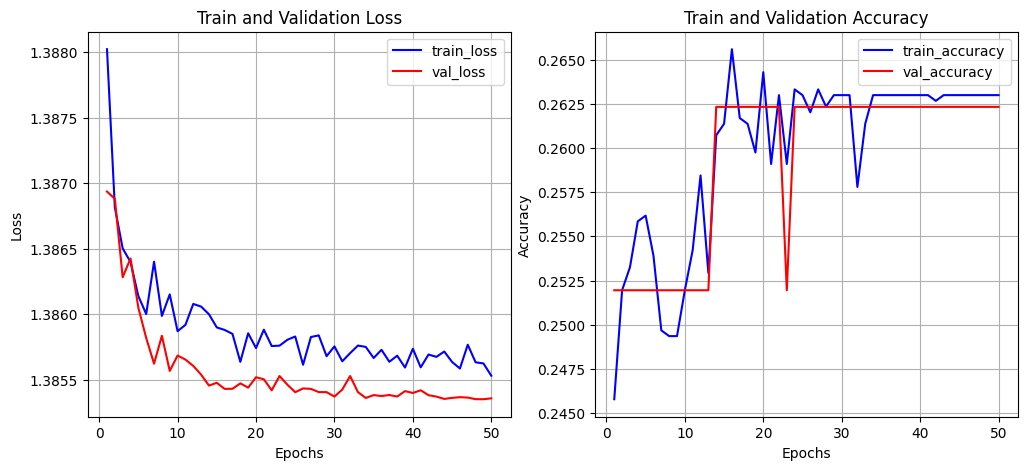

In [74]:
import matplotlib.pyplot as plt

history_dict = lstm_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [75]:
import json

def load_test_df():
    with open("data/test.json") as file:
        test_json = json.load(file)
    
    file_names = []
    conversations = []
    for file_name in test_json:
        conversation = test_json[file_name]["text"]

        file_names.append(file_name)
        conversations.append(conversation)
        
    return pd.DataFrame({"file_name": file_names, "conversation": conversations})
    
test = load_test_df()
test

,file_name,conversation
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...,...
495,t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [76]:
# 결측치 제거, 중복 제거, 불용어 제거한 데이터를 제공하는 fucntion
def load_test(data):
    
    data['conversation'] = data['conversation'].map(lambda x: sentence_analysis(x))

    return data

In [77]:
test = load_test(test)
#텍스트 데이터 토큰화
X_test_seq = tokenizer.texts_to_sequences(test)

# 패딩을 통해 동일한 길이로 조정
max_length = 535  # 적절한 길이로 조정
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [138]:
def evaluate_model(model, X_val_padded, threshold=0.7):
    predictions = model.predict(X_val_padded)
    predicted_labels = np.argmax(predictions, axis=1)
    predicted_confidences = np.max(predictions, axis=1)
    
    # 새로운 클래스로 분류
    new_class_label = num_classes  # 기존 클래스 + 1
    final_predictions = [new_class_label if conf < threshold else label for label, conf in zip(predicted_labels, predicted_confidences)]
    
    # accuracy = accuracy_score(y_val, final_predictions)
    # f1 = f1_score(y_val, final_predictions, average='weighted')
    
    # print(f"Accuracy: {accuracy}")
    # print(f"F1 Score: {f1}")
    return final_predictions

# # Prediction
# model = lstm_model
# accuracy, f1 = evaluate_model(model, X_val_padded, y_val, threshold = 0.8)

# predictions_prob = model.predict(X_test_padded)
# predictions = np.argmax(predictions_prob, axis=1)
# test["class"] = predictions
# test["class_str"] = test_df["class"].apply(lambda x: label_to_class[x])
# test

In [140]:
predictions = evaluate_model(model, X_test_padded)
print(predictions)
test["class"] = predictions
test["class_str"] = test_df["class"].apply(lambda x: label_to_class[x])
test


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[4, 4]


ValueError: Length of values (2) does not match length of index (500)

In [ ]:
submission_df = pd.read_csv("data/new_submission.csv")
test_submission_df = (submission_df
                      .merge(test_df[["file_name", "class"]], on="file_name")
                      .drop(columns=["class_x"])
                      .rename(columns={"class_y": "class"}))
test_submission_df.to_csv(f"results/lstm_{NOW}.csv", index=False)
pd.read_csv(f"results/lstm_{NOW}.csv")

## RNN - GRU

In [146]:
# GRU 모델 정의
def create_gru_model(vocab_size, max_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        tf.keras.layers.GRU(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [150]:
# GRU 모델 훈련
gru_model = create_gru_model(vocab_size, max_length, num_classes)
gru_history = gru_model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_val_padded, y_val), batch_size=32)

# 모델 저장
gru_model.save('gru_model.h5')

Epoch 1/50


c:\Users\soyso\anaconda3\envs\soybean\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 616ms/step - accuracy: 0.2393 - loss: 1.3891 - val_accuracy: 0.2519 - val_loss: 1.3865
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 58s 602ms/step - accuracy: 0.2551 - loss: 1.3887 - val_accuracy: 0.2519 - val_loss: 1.3868
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 60s 617ms/step - accuracy: 0.2462 - loss: 1.3881 - val_accuracy: 0.2519 - val_loss: 1.3866
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 661ms/step - accuracy: 0.2492 - loss: 1.3887 - val_accuracy: 0.2519 - val_loss: 1.3865
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 604ms/step - accuracy: 0.2497 - loss: 1.3878 - val_accuracy: 0.2519 - val_loss: 1.3863
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 607ms/step - accuracy: 0.2443 - loss: 1.3881 - val_accuracy: 0.2519 - val_loss: 1.3859
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 603ms/step - accuracy: 0.2532 - loss: 1.3876 - val_accuracy: 0.2519 - val_loss: 1.3858
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 607ms/step - accuracy: 0.2505 - loss: 1.3878 - val_accuracy: 0.251

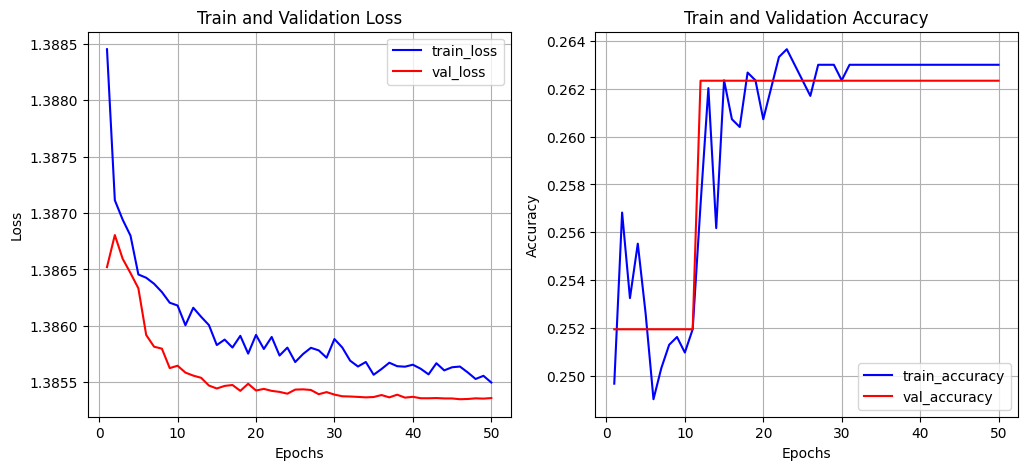

In [151]:
import matplotlib.pyplot as plt

history_dict = gru_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [153]:
predictions = evaluate_model(model, X_test_padded)
print(predictions)
test["class"] = predictions
test["class_str"] = test_df["class"].apply(lambda x: label_to_class[x])
test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[4, 4]


ValueError: Length of values (2) does not match length of index (500)

In [ ]:
submission_df = pd.read_csv("data/new_submission.csv")
test_submission_df = (submission_df
                      .merge(test_df[["file_name", "class"]], on="file_name")
                      .drop(columns=["class_x"])
                      .rename(columns={"class_y": "class"}))
test_submission_df.to_csv(f"results/gru_{NOW}.csv", index=False)
pd.read_csv(f"results/gru_{NOW}.csv")

In [12]:
! pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB 330.3 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 1.2 MB/s eta 0:00:02
   ------------- -------------------------- 0.6/1.7 MB 4.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.9 MB/s eta 0:00:00


In [173]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, TFElectraForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 설정
EPOCHS = 5  # epochs를 더 늘릴 수 있지만, 실습을 위해 5로 설정합니다.
BATCH_SIZE = 16
MAX_LENGTH = max_len  # 문장 최대 길이
MODEL_SAVE_PATH = "saved_models/"
NUM_CLASSES = 4  # 클래스 수
RANDOM_SEED = 42

# 랜덤 시드 고정
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## KOBERT

In [174]:
# 결측치 제거, 중복 제거, 불용어 제거한 데이터를 제공하는 fucntion
def load_data(path):
    train_data_path = path
    data = pd.read_csv(train_data_path)
    
    # 중복 제거
    data.drop_duplicates(subset = ['conversation'], inplace=True)
    
    
    data['conversation'] = data['conversation'].map(lambda x: sentence_organizer(x))

    return data

In [175]:
train_data_path ="data/train.csv"
train_data = load_data(train_data_path)
train_text = train_data['conversation']
train_data = changeClassInt(train_data)
tar_data = train_data['class']

train_text = list(train_text)
tar_data = list(tar_data)


# 훈련 및 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_text, tar_data, test_size=0.2, random_state=RANDOM_SEED, stratify=tar_data)



In [167]:
print(X_train[:2])

['니가 먼저 끼어들었자나  지금 누구보러 니라고 지칭하십니까 ? 이새끼가 인성있는척하네 니가 내 길 방해안했나  아닙니다 전 여유를 두고 들어왔습니다 비켜주시죠  고마이 치아 다 뽑아가 피 철철나면서 생 마감하게 해주까 선생님 이러지 말고 비켜주시죠 말길을 못알아듣네 영영 눈 못뜨게 해준다는 말인데 ?  죄송합니다 제가 다 죄송합니다  표정이 영 맘에 들지 않아   제가 표정이 안좋았다면 죄송합니다 좋은 인상으로 바꾸겠습니다 이제 그만 둬주세요', '거기 이리와봐. 저요? 그래 교복입은 너 왜 그러시는대요? 이리올래? 내가 갈까? 왜그러시는데요. 저 학원가야 해요. 너 지금 돈 있는거 다 내놔 문제집 살 돈이에요. 맞고싶냐? 좋게 말할때 돈 내놔 돈 드릴테니까 때리지마세요.']


In [176]:
# 토크나이저 선택
def get_tokenizer(model_name):
    return AutoTokenizer.from_pretrained(model_name)

# 토크나이징 함수
def tokenize_sentences(tokenizer, sentences, max_length):
    # X_train = []

    # for sen in sentences:
    #     print(sen)
    #     t = sen.split(" ")
    #     print(t)
    #     tokened = tokenizer(
    #     text = t,
    #     padding='max_length',
    #     truncation=True,
    #     return_tensors='tf',
    #     max_length=max_length
    # )
    #     X_train.append(tokened)    

    return tokenizer(
        text=sentences,
        padding='max_length',
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )


In [133]:
print(X_train[:2])

['니가 먼저 끼어들었자나  지금 누구보러 니라고 지칭하십니까 ? 이새끼가 인성있는척하네 니가 내 길 방해안했나  아닙니다 전 여유를 두고 들어왔습니다 비켜주시죠  고마이 치아 다 뽑아가 피 철철나면서 생 마감하게 해주까 선생님 이러지 말고 비켜주시죠 말길을 못알아듣네 영영 눈 못뜨게 해준다는 말인데 ?  죄송합니다 제가 다 죄송합니다  표정이 영 맘에 들지 않아   제가 표정이 안좋았다면 죄송합니다 좋은 인상으로 바꾸겠습니다 이제 그만 둬주세요'
 '거기 이리와봐. 저요? 그래 교복입은 너 왜 그러시는대요? 이리올래? 내가 갈까? 왜그러시는데요. 저 학원가야 해요. 너 지금 돈 있는거 다 내놔 문제집 살 돈이에요. 맞고싶냐? 좋게 말할때 돈 내놔 돈 드릴테니까 때리지마세요.']


In [177]:
# KoBERT 모델 훈련
model_name = 'monologg/kobert'
tokenizer = get_tokenizer(model_name)
X_train_tokenized = tokenize_sentences(tokenizer, X_train, MAX_LENGTH)
X_val_tokenized = tokenize_sentences(tokenizer, X_val, MAX_LENGTH)

# X_train_tokenized = []
# for s in X_train:
#     t = tokenizer(text = s,  padding= 'max_length', truncation = True, max_length = MAX_LENGTH, return_tensors='tf')
#     X_train_tokenized.append(t)


# X_val_tokenized = []
# for s in X_val:
#     t = tokenizer(text = s,  padding= 'max_length', truncation = True, max_length = MAX_LENGTH, return_tensors='tf')
#     X_val_tokenized.append(t)


In [171]:
print(len(X_train_tokenized))
print(X_train_tokenized)
# print(X_train_tokenized[0][0])

# print(X_val_tokenized[1])

3
{'input_ids': <tf.Tensor: shape=(3076, 535), dtype=int32, numpy=
array([[   2,    0,    0, ...,    1,    1,    1],
       [   2,    0,    0, ...,    1,    1,    1],
       [   2,    0,    0, ...,    1,    1,    1],
       ...,
       [   2, 6844, 5691, ...,    1,    1,    1],
       [   2,    0,    0, ...,    1,    1,    1],
       [   2, 7323,    0, ...,    1,    1,    1]])>, 'token_type_ids': <tf.Tensor: shape=(3076, 535), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(3076, 535), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}


In [178]:
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=NUM_CLASSES)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# 모델 훈련
kobert_history = model.fit(
    [X_train_tokenized['input_ids'], X_train_tokenized['attention_mask']],
    y_train,
    validation_data=([X_val_tokenized['input_ids'], X_val_tokenized['attention_mask']], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# 모델 저장
model.save_pretrained(MODEL_SAVE_PATH + 'kobert')
tokenizer.save_pretrained(MODEL_SAVE_PATH + 'kobert')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000001CE7B13B1F0>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


def tokenize(texts, labels, max_length):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    ))
    return dataset

train_df = load_data(TRAIN_DATA_PATH)
train_df["class_num"] = train_df["class"].map(class_map)

X_train, X_val, y_train, y_val = train_test_split(train_df["conversation"], train_df["class_num"], 
                                                  test_size=0.2, random_state=42, 
                                                  stratify=train_df["class_num"])

train_dataset = (tokenize(X_train.tolist(), y_train, MAX_LENGTH)
           .shuffle(len(X_train))
           .batch(BATCH_SIZE)
           .prefetch(tf.data.experimental.AUTOTUNE))

val_dataset = (tokenize(X_val.tolist(), y_val, MAX_LENGTH)
           .shuffle(len(X_val))
           .batch(BATCH_SIZE)
           .prefetch(tf.data.experimental.AUTOTUNE))

## KoELECTRA

## KLUE-BERT